### This loads the necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Load data and split the descriptive and target feature

In [4]:
#Load original procrustes transformed coordinates
df1 = pd.read_csv('Proc_Coord1.csv')

#Split data so last five observations are left out of model fitting
df2 = df1.iloc[:-5]
x1 = df2[['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8']].values

#Bring in target variable and split that one as well
gender = pd.read_csv('Id_Gender.csv')
target = gender['Gender'].values
gender1 = gender.iloc[:-5]
target1 = gender1['Gender'].values

#Gather last five observations and store for later testing
tester = df1.iloc[-5:]
x1_tester = tester[['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8']].values
print(x1_tester)

g_test = gender.iloc[-5:]
tester_target = g_test['Gender'].values
print(tester_target)
print(target)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, target1, test_size=0.3, random_state=0)




[[-0.21307074 -0.15158106 -0.16685782 -0.2946309   0.09752457  0.17589184
   0.28232615 -0.02663947  0.21125882  0.22719396  0.01723971 -0.19899718
  -0.33279848  0.01163529  0.00934979  0.47114608 -0.06271278  0.11149031
  -0.27113886  0.03741176  0.19763884  0.13097278  0.077122   -0.3397746 ]
 [-0.2520832  -0.14335651 -0.15276463 -0.18666983  0.11079739  0.26179574
   0.29464117 -0.04484822  0.2426408   0.22636817  0.00137257 -0.21753497
  -0.3169487  -0.05583965 -0.21155465  0.36609863 -0.0367526   0.15946961
  -0.19147698  0.06080958  0.27221347  0.06007072  0.10781744 -0.35426536]
 [-0.23560627 -0.13592874 -0.16698609 -0.21351951  0.12950558  0.26726547
   0.28046691 -0.04223177  0.2652229   0.20873397  0.01702656 -0.20612031
  -0.30059068 -0.0938303  -0.19905197  0.38756613 -0.06204785  0.0848707
  -0.21862033  0.08432786  0.28785511  0.09156978  0.10317867 -0.33305581]
 [-0.2524823  -0.11277421 -0.06037479 -0.23689591  0.07473006  0.23540753
   0.27456286 -0.02456588  0.2244446

## Fit Model

In [5]:
LDA = LinearDiscriminantAnalysis(n_components=2)
x1_lda = LDA.fit_transform(x1_train, y1_train)

#print(x1_lda)


x1_test_lda = LDA.transform(x1_test)
lda1_train_score = LDA.score(x1_train, y1_train)
lda1_test_score = LDA.score(x1_test, y1_test)
full1_score = LDA.score(x1, target1)
print(lda1_train_score)
print(lda1_test_score)
print(full1_score)

#print(x1_train)

x1_tester_lda = LDA.transform(x1_tester)
tester_prediction = LDA.predict(x1_tester)
print(tester_prediction)

0.9616858237547893
0.9464285714285714
0.9571045576407506
['M' 'F' 'F' 'F' 'F']


C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Plot Linear Discriminant Scores as Histograms

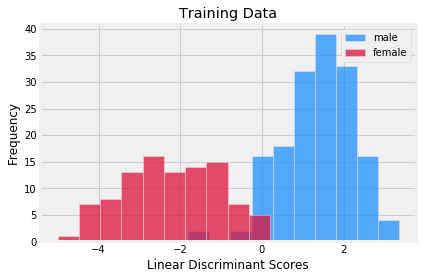

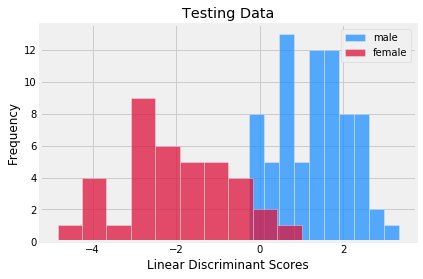

In [5]:
plt.rcParams["patch.force_edgecolor"] = True

plt.hist(x=x1_lda[:,0][y1_train=='M'], color = 'dodgerblue', alpha=0.75, label='male')
plt.hist(x=x1_lda[:,0][y1_train=='F'], color = 'crimson', alpha=0.75, label='female')
plt.xlabel('Linear Discriminant Scores')
plt.ylabel('Frequency')
plt.title('Training Data')
leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.9)
plt.savefig("training_LDA.jpeg", dpi='figure')
plt.show()


plt.hist(x=x1_test_lda[:,0][y1_test=='M'], color = 'dodgerblue', alpha=0.75, label='male')
plt.hist(x=x1_test_lda[:,0][y1_test=='F'], color = 'crimson', alpha=0.75, label='female')
plt.xlabel('Linear Discriminant Scores')
plt.ylabel('Frequency')
plt.title('Testing Data')
leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.9)
plt.savefig("testing_LDA1.jpeg", dpi='figure')#, bbox_inches='tight')
plt.show()